# Name: HRITIK BANA
# Roll No.: 19141

# Assignment 3 

## Answer 1

## (3) On Policy TD control (SARSA)

In [166]:
import HRITIK_BANA_19141_warehouse
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [167]:
env = HRITIK_BANA_19141_warehouse.WarehouseAgent()
alpha = 0.85
EPS = 0.92
gamma = 0.95

Q = {}
xcoord = [i for i in range(7)]
ycoord = [i for i in range(6)]

actionSpace = ['UP', 'DOWN', 'LEFT', 'RIGHT']

stateSpace = [] 

for i in xcoord:
    for j in ycoord:
        for action in actionSpace:
            Q[((i, j), action)] = 0
        stateSpace.append((i, j))

In [168]:
def choose(state):
    rand = np.random.random()
    if rand < 1 - EPS:
#         state = (x, y)
        values = np.array([Q[(state, a)] for a in actionSpace])
        best = np.random.choice(np.where(values == values.max())[0])
        policy[state] = actionSpace[best]
    else:
        policy[state] = np.random.choice(actionSpace)
    return policy[state]

In [170]:
policy = {}
for state in stateSpace:
    policy[state] = np.random.choice(actionSpace)

numEpisodes = 1000
for i in range(numEpisodes):
    statesActionsReturns = []
    memory = []
    observation, box_observation = env.reset()
    done = False
    count_steps = 0
    max_steps = 50
    while not done:
        if count_steps == max_steps:
            break
        count_steps += 1
        action = choose(tuple(observation))
        observation_, reward, done = env.step(action)
        memory.append((observation[0], observation[1], action, reward))
        observation = observation_
    memory.append((observation[0], observation[1], action, reward))

    last = True
    for x, y, action, reward in reversed(memory):
        if last:
            last = False
        else:
            statesActionsReturns.append((x, y, action, reward))


    statesActionsReturns.reverse()
    statesActionsVisited = []


    x0, y0, action0, reward0 = statesActionsReturns[0]    
    sa = ((x0, y0), action0)

    for x, y, action, reward in statesActionsReturns:
        sa_ = ((x, y), action)
        if sa_ not in statesActionsVisited:
            Q[sa] += alpha * (reward + (gamma * Q[sa_]) - Q[sa])
            sa = sa_
            statesActionsVisited.append(sa)

    if EPS - 1e-7 > 0:
        EPS -= 1e-7
    else:
        EPS = 0
    
    eps_returns.append(np.array(statesActionsReturns)[:, 3].astype(np.float).mean())

print('\n')
print("Best selected policy :", policy)



Best selected policy : {(0, 0): 'RIGHT', (0, 1): 'LEFT', (0, 2): 'DOWN', (0, 3): 'LEFT', (0, 4): 'UP', (0, 5): 'DOWN', (1, 0): 'UP', (1, 1): 'RIGHT', (1, 2): 'DOWN', (1, 3): 'LEFT', (1, 4): 'DOWN', (1, 5): 'DOWN', (2, 0): 'RIGHT', (2, 1): 'DOWN', (2, 2): 'DOWN', (2, 3): 'UP', (2, 4): 'LEFT', (2, 5): 'DOWN', (3, 0): 'LEFT', (3, 1): 'UP', (3, 2): 'LEFT', (3, 3): 'RIGHT', (3, 4): 'DOWN', (3, 5): 'UP', (4, 0): 'RIGHT', (4, 1): 'UP', (4, 2): 'UP', (4, 3): 'LEFT', (4, 4): 'LEFT', (4, 5): 'RIGHT', (5, 0): 'LEFT', (5, 1): 'UP', (5, 2): 'LEFT', (5, 3): 'LEFT', (5, 4): 'UP', (5, 5): 'RIGHT', (6, 0): 'RIGHT', (6, 1): 'UP', (6, 2): 'RIGHT', (6, 3): 'DOWN', (6, 4): 'RIGHT', (6, 5): 'DOWN'}


## (4) Off policy TD control (Q-Learning)

In [171]:
env = HRITIK_BANA_19141_warehouse.WarehouseAgent()
alpha = 0.85
EPS = 0.92
gamma = 0.95

Q = {}
xcoord = [i for i in range(7)]
ycoord = [i for i in range(6)]

actionSpace = ['UP', 'DOWN', 'LEFT', 'RIGHT']

stateSpace = [] 

for i in xcoord:
    for j in ycoord:
        for action in actionSpace:
            Q[((i, j), action)] = 0
        stateSpace.append((i, j))

In [172]:
def choose(state):
    rand = np.random.random()
    if rand < 1 - EPS:
#         state = (x, y)
        values = np.array([Q[(state, a)] for a in actionSpace])
        best = np.random.choice(np.where(values == values.max())[0])
        policy[state] = actionSpace[best]
    else:
        policy[state] = np.random.choice(actionSpace)
    return policy[state]

In [173]:
policy = {}
for state in stateSpace:
    policy[state] = np.random.choice(actionSpace)
eps_returns = []
numEpisodes = 1000
for i in range(numEpisodes):
    statesActionsReturns = []
    memory = []
    observation, box_observation = env.reset()
    done = False
    count_steps = 0
    max_steps = 100
    while not done:
        if count_steps == max_steps:
            break
        count_steps += 1
        action = choose(tuple(observation))
        observation_, reward, done = env.step(action)
        memory.append((observation[0], observation[1], action, reward))
        observation = observation_
    memory.append((observation[0], observation[1], action, reward))
    
    
    last = True
    for x, y, action, reward in reversed(memory):
        if last:
            last = False
        else:
            statesActionsReturns.append((x, y, action, reward))


    statesActionsReturns.reverse()
    statesActionsVisited = []


    x0, y0, action0, reward0 = statesActionsReturns[0]    
    sa = ((x0, y0), action0)

    for x, y, action, reward in statesActionsReturns:
        try:
            
            values = np.array([Q[((x,y), a)] for a in actionSpace])
            a_ = np.where(values == values.max())[0][0]
            sa_ = ((x,y), a_)
            if sa_ not in statesActionsVisited:
                Q[sa] += alpha * (reward + (gamma * Q[sa_]) - Q[sa])
                sa = sa_
                statesActionsVisited.append(sa)            
        except:
            pass
        
    if EPS - 1e-7 > 0:
        EPS -= 1e-7
    else:
        EPS = 0
    eps_returns.append(np.array(statesActionsReturns)[:, 3].astype(np.float).mean())

print('\n')
print("Best selected policy :", policy)



Best selected policy : {(0, 0): 'LEFT', (0, 1): 'RIGHT', (0, 2): 'LEFT', (0, 3): 'RIGHT', (0, 4): 'UP', (0, 5): 'RIGHT', (1, 0): 'LEFT', (1, 1): 'RIGHT', (1, 2): 'DOWN', (1, 3): 'UP', (1, 4): 'RIGHT', (1, 5): 'RIGHT', (2, 0): 'RIGHT', (2, 1): 'UP', (2, 2): 'DOWN', (2, 3): 'RIGHT', (2, 4): 'DOWN', (2, 5): 'LEFT', (3, 0): 'LEFT', (3, 1): 'RIGHT', (3, 2): 'DOWN', (3, 3): 'LEFT', (3, 4): 'DOWN', (3, 5): 'DOWN', (4, 0): 'DOWN', (4, 1): 'RIGHT', (4, 2): 'DOWN', (4, 3): 'LEFT', (4, 4): 'LEFT', (4, 5): 'LEFT', (5, 0): 'LEFT', (5, 1): 'UP', (5, 2): 'LEFT', (5, 3): 'LEFT', (5, 4): 'UP', (5, 5): 'LEFT', (6, 0): 'RIGHT', (6, 1): 'LEFT', (6, 2): 'RIGHT', (6, 3): 'LEFT', (6, 4): 'DOWN', (6, 5): 'LEFT'}


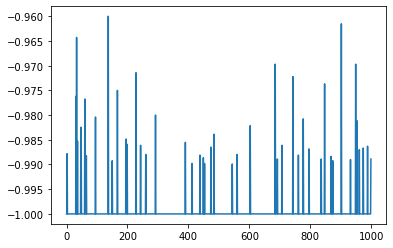

In [174]:
x = [i for i in range(numEpisodes)]

plt.plot(x, eps_returns)

## (1) On Policy Monte Carlo

In [175]:
env = HRITIK_BANA_19141_warehouse.WarehouseAgent()
EPS = 0.05
GAMMA = 1.0

Q = {}

xcoord = [i for i in range(7)]

ycoord = [i for i in range(6)]

actionSpace = ['UP', 'DOWN', 'LEFT', 'RIGHT']

In [176]:
stateSpace = []
returns = {}
pairsVisited = {}


for i in xcoord:
    for j in ycoord:
        for action in actionSpace:
            Q[((i, j), action)] = 0
            returns[((i, j), action)] = 0
            pairsVisited[((i, j), action)] = 0
        stateSpace.append((i, j))


policy = {}
for state in stateSpace:
    policy[state] = np.random.choice(actionSpace)

In [177]:
numEpisodes = 1000
for i in range(numEpisodes):
    statesActionsReturns = []
    memory = []
    observation, box_observation = env.reset()
    done = False
    count_steps = 0
    max_steps = 50
    while not done:
        if count_steps == max_steps:
            break
        count_steps += 1
        action = policy[tuple(observation)]
        observation_, reward, done = env.step(action)
        memory.append((observation[0], observation[1], action, reward))
        observation = observation_
    memory.append((observation[0], observation[1], action, reward))

    G = 0
    last = True
    for x, y, action, reward in reversed(memory):
        if last:
            last = False
        else:
            statesActionsReturns.append((x, y, action, G))
        G = GAMMA*G + reward


    statesActionsReturns.reverse()
    statesActionsVisited = []


    for x, y, action, G in statesActionsReturns:
        sa = ((x, y), action)
        if sa not in statesActionsVisited:
            pairsVisited[sa] += 1

            returns[(sa)] += (1 / pairsVisited[(sa)])*(G-returns[(sa)])
            Q[sa] = returns[sa]
            rand = np.random.random()
            if rand < 1 - EPS:
                state = (x, y)
                values = np.array([Q[(state, a)] for a in actionSpace])
                best = np.random.choice(np.where(values == values.max())[0])
                policy[state] = actionSpace[best]
            else:
                policy[state] = np.random.choice(actionSpace)
            statesActionsVisited.append(sa)

    if EPS - 1e-7 > 0:
        EPS -= 1e-7
    else:
        EPS = 0

print('\n')
print("Best selected policy :", policy)




Best selected policy : {(0, 0): 'UP', (0, 1): 'RIGHT', (0, 2): 'RIGHT', (0, 3): 'DOWN', (0, 4): 'UP', (0, 5): 'UP', (1, 0): 'DOWN', (1, 1): 'DOWN', (1, 2): 'DOWN', (1, 3): 'DOWN', (1, 4): 'DOWN', (1, 5): 'DOWN', (2, 0): 'LEFT', (2, 1): 'RIGHT', (2, 2): 'RIGHT', (2, 3): 'LEFT', (2, 4): 'UP', (2, 5): 'UP', (3, 0): 'RIGHT', (3, 1): 'RIGHT', (3, 2): 'UP', (3, 3): 'UP', (3, 4): 'UP', (3, 5): 'LEFT', (4, 0): 'UP', (4, 1): 'UP', (4, 2): 'DOWN', (4, 3): 'DOWN', (4, 4): 'UP', (4, 5): 'DOWN', (5, 0): 'RIGHT', (5, 1): 'LEFT', (5, 2): 'DOWN', (5, 3): 'UP', (5, 4): 'RIGHT', (5, 5): 'RIGHT', (6, 0): 'RIGHT', (6, 1): 'RIGHT', (6, 2): 'DOWN', (6, 3): 'LEFT', (6, 4): 'LEFT', (6, 5): 'UP'}


## (2) Off-policy Monte Carlo

In [180]:
env = HRITIK_BANA_19141_warehouse.WarehouseAgent()
EPS = 0.05
GAMMA = 1.0


xcoord = [i for i in range(7)]

ycoord = [i for i in range(6)]

actionSpace = ['UP', 'DOWN', 'LEFT', 'RIGHT']

stateSpace = []
returns = {}
pairsVisited = {}

Q = {}
C = {}
for i in xcoord:
    for j in ycoord:
        for action in actionSpace:
            Q[((i, j), action)] = 0
            C[((i, j), action)] = 0
        stateSpace.append((i, j))


targetPolicy = {}
for state in stateSpace:
    values = np.array([Q[(state, a)] for a in actionSpace])
    best = np.random.choice(np.where(values==values.max())[0])
    targetPolicy[state] = actionSpace[best]




numEpisodes = 1000
for i in range(numEpisodes):
    memory = []
    behaviourPolicy = {}
    for state in stateSpace:
        rand = np.random.random()
        if rand < 1 - EPS:
            behaviourPolicy[state] = [targetPolicy[state]]
        else:
            behaviourPolicy[state] = actionSpace

    observation, box_observation = env.reset()
    done = False
    count_steps = 0
    max_steps = 1000
    while not done:
        if count_steps == max_steps:
            break
        count_steps += 1
        action = np.random.choice(behaviourPolicy[tuple(observation)])
        observation_, reward, done = env.step(action)
        memory.append((observation[0], observation[1], action, reward))
        observation = observation_
    memory.append((observation[0], observation[1], action, reward))

    G = 0
    W = 1
    last = True
    for x, y, action, reward in reversed(memory):
        sa = ((x,y), action)
        if last:
            last = False
        else:
            C[sa] += W
            Q[sa] += (W / C[sa])*(G - Q[sa])
            values = np.array([Q[(state, a)] for a in actionSpace])
            best = np.random.choice(np.where(values == values.max())[0])
            targetPolicy[state] = actionSpace[best]
            if action != targetPolicy[state]:
                break
            if len(behaviourPolicy[state]) == 1:
                prob = 1 - EPS
            else:
                prob = EPS / len(behaviourPolicy[state])
            W *= 1/prob
        G = GAMMA*G + reward
   
    if EPS - 1e-7 > 0:
        EPS -= 1e-7
    else:
        EPS = 0



print('\n')
print("Best policy :", targetPolicy)



Best policy : {(0, 0): 'UP', (0, 1): 'UP', (0, 2): 'UP', (0, 3): 'UP', (0, 4): 'UP', (0, 5): 'RIGHT', (1, 0): 'UP', (1, 1): 'LEFT', (1, 2): 'LEFT', (1, 3): 'UP', (1, 4): 'DOWN', (1, 5): 'LEFT', (2, 0): 'DOWN', (2, 1): 'RIGHT', (2, 2): 'DOWN', (2, 3): 'UP', (2, 4): 'DOWN', (2, 5): 'LEFT', (3, 0): 'LEFT', (3, 1): 'LEFT', (3, 2): 'RIGHT', (3, 3): 'RIGHT', (3, 4): 'UP', (3, 5): 'UP', (4, 0): 'RIGHT', (4, 1): 'RIGHT', (4, 2): 'LEFT', (4, 3): 'LEFT', (4, 4): 'DOWN', (4, 5): 'UP', (5, 0): 'UP', (5, 1): 'LEFT', (5, 2): 'UP', (5, 3): 'LEFT', (5, 4): 'UP', (5, 5): 'DOWN', (6, 0): 'UP', (6, 1): 'RIGHT', (6, 2): 'DOWN', (6, 3): 'LEFT', (6, 4): 'LEFT', (6, 5): 'UP'}


## Answer 2

On starting with the given initial conditions, the agent should ideally follow a path like: DOWN, DOWN, RIGHT, RIGHT, DOWN, LEFT, LEFT, DOWN, LEFT, UP. Looking at the best policy obtained by different methods, SARSA and Q-Learning, mostly follow the above path in the corresponding agent locations. So it seems that SARSA and Q-Learning are performing the best with respect to this problem.